In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from glob import glob
import ipywidgets as wdg
import time
from IPython import display
from scipy import signal
import copy as cp
import random
import collections

In [2]:
#Busqueda y creacion del directorio del output
def create_dir(path):
    try:
        if not os.path.exists(path):
            os.makedirs(path)
    except OSError:
        print(f"ERROR: creating directory with name {path}")

In [3]:
def video_size(video_path):
    
    cap = cv2.VideoCapture(video_path)
    ret, frame = cap.read()
    height, width  = frame.shape[:2]
    
    return height, width

In [4]:
def histograma_3D(frame):

    color = ('b','g','r')
    hist = np.arange(0)
    for i, c in enumerate(color):
        c_hist = cv2.calcHist([frame], [i], None, [256], [0, 256])
        hist = np.append(hist, c_hist)   
    return hist

In [5]:
def average(video_path):
    min_dist = 0
    max_dist = 0
    avg = 0
    cap = cv2.VideoCapture(video_path)
    hist_ant = []
    idx = 0
    M_hist = np.array([])
    while True:
        ret, frame = cap.read()              
        # Condicional en caso no exista mas frames a leer
        if ret == False:
            cap.release()
            break
        #Cantidad de frames que vamos a guardar filtrado por la correlacion de pearson             
        hist = histograma_3D(frame)  
        if idx > 0:
            dist_euc = np.linalg.norm(hist-hist_ant)
            if idx == 1:
                min_dist = dist_euc
            else:
                if min_dist > dist_euc:
                    min_dist = dist_euc    
                elif max_dist < dist_euc:
                    max_dist = dist_euc      
        hist_ant = hist
        idx += 1
        
    avg = (min_dist+max_dist)/2
    return avg
    

In [6]:
def Show_Cantframes(length, length_sum, save_path):
 
    Porcentaje = (100*length_sum)/length
    ## Declaramos valores para el eje x
    eje_x = ['Original :'+str(length), 'Resumen :'+str(length_sum)]

    ## Declaramos valores para el eje y
    eje_y = [length,length_sum]

    ## Creamos Gráfica
    plt.bar(eje_x, eje_y)

    ## Legenda en el eje y
    plt.ylabel('Cantidad de fotogramas')

    ## Legenda en el eje x
    plt.xlabel('video')

    ## Título de Gráfica
    plt.title('Cantidad de fotogramas por video')

    ## Mostramos Gráfica
    plt.savefig(f"{save_path}/Diagram.png")
    
    plt.cla()

    print("Porcentaje de fotogramas reducidos: "+str(Porcentaje))

In [7]:
def save_frame(video_path, save_dir):
    name = video_path.split("\\")[-1].split(".")[0]
    save_path = os.path.join(save_dir, name)
    create_dir(save_path)

    cap = cv2.VideoCapture(video_path)
    video_size(video_path)
    #Guardado de fotograma e histograma
    height, width = video_size(video_path)
    video = cv2.VideoWriter(f"{save_path}/{name}.mp4", cv2.VideoWriter_fourcc(*'mp4v'), 2, (width,height))
    idx = 0
    avg = average(video_path)
    length_sum = 0
    while True:
        #Verificar y leer cada frame del video
        ret, frame = cap.read()                
        # Condicional en caso no exista mas frames a leer
        if ret == False:
            cap.release()
            break
        #Cantidad de frames que vamos a guardar filtrado por la correlacion de pearson        
        if idx == 0:           
            cv2.imwrite(f"{save_path}/{idx}.png", frame)
            video.write(frame)
            semilla = histograma_3D(frame)
            length_sum += 1
        if idx > 0:
            hist = histograma_3D(frame)
            dist = np.linalg.norm(semilla-hist)
            #Comparacion entre pares de frames consecutivos
            if dist > avg:
                cv2.imwrite(f"{save_path}/{idx}.png", frame)
                video.write(frame)
                semilla = hist
                length_sum += 1    
        frame_ant = frame
        idx += 1
    video.release()
    Show_Cantframes(idx, length_sum, save_path)

Porcentaje de fotogramas reducidos: 0.3539454507599417
Porcentaje de fotogramas reducidos: 0.08017638805371818
Porcentaje de fotogramas reducidos: 0.45454545454545453
Porcentaje de fotogramas reducidos: 0.08504847763225039
Porcentaje de fotogramas reducidos: 0.22406453058480844
Porcentaje de fotogramas reducidos: 0.0678195998643608
Porcentaje de fotogramas reducidos: 0.6405329233922623
Porcentaje de fotogramas reducidos: 0.20040080160320642
Porcentaje de fotogramas reducidos: 0.22508696541845713
Porcentaje de fotogramas reducidos: 0.3125
Porcentaje de fotogramas reducidos: 1.0012515644555695
Porcentaje de fotogramas reducidos: 0.0757193336698637
Porcentaje de fotogramas reducidos: 0.12711094970038134
Porcentaje de fotogramas reducidos: 0.2963511761437303
Porcentaje de fotogramas reducidos: 0.20526217577906325
Porcentaje de fotogramas reducidos: 0.5354200988467874
Porcentaje de fotogramas reducidos: 0.18785222291797118
Porcentaje de fotogramas reducidos: 0.22701475595913734
Porcentaje d

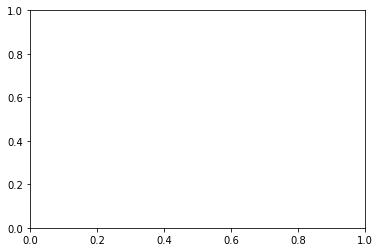

In [8]:
# Introduzca el error y resuma los videos
if __name__== "__main__":
            video_paths = glob("Videos/*")
            save_dir = "save"
            
            for path in video_paths:
                save_frame(path, save_dir)

       